In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/auto-mpg.csv')

print(df.head())

print(df.tail())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.

In [6]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
df['horsepower'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [13]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,  93, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [12]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(int)
hp_median = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(hp_median)

In [14]:
hp_median

93.0

In [15]:
df2 = df.drop('car name', axis=1)
print(df2)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [17]:
high_mpg = df[df['mpg']>=30]
print(high_mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
51   30.0          4          79.0          70    2074          19.5   
52   30.0          4          88.0          76    2065          14.5   
53   31.0          4          71.0          65    1773          19.0   
54   35.0          4          72.0          69    1613          18.0   
129  31.0          4          79.0          67    1950          19.0   
..    ...        ...           ...         ...     ...           ...   
390  32.0          4         144.0          96    2665          13.9   
391  36.0          4         135.0          84    2370          13.0   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin             car name  
51           71       2          peugeot 304  
52           71       2            fiat 1

In [19]:
high_mpg['hp_weight_ratio'] = (high_mpg['weight'] / high_mpg['horsepower']).round(2)
print(high_mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
51   30.0          4          79.0          70    2074          19.5   
52   30.0          4          88.0          76    2065          14.5   
53   31.0          4          71.0          65    1773          19.0   
54   35.0          4          72.0          69    1613          18.0   
129  31.0          4          79.0          67    1950          19.0   
..    ...        ...           ...         ...     ...           ...   
390  32.0          4         144.0          96    2665          13.9   
391  36.0          4         135.0          84    2370          13.0   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin             car name  hp_weight_ratio  
51           71       2          peugeot 304            29.63  
52     

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_83193/1740884209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_mpg['hp_weight_ratio'] = (high_mpg['weight'] / high_mpg['horsepower']).round(2)


In [21]:
grouped_df = df.groupby(['cylinders', 'origin']).agg({
    'mpg': ['mean', 'std'],
    'horsepower': ['max', 'min']
}).round(2)
print(grouped_df)


                    mpg       horsepower    
                   mean   std        max min
cylinders origin                            
3         3       20.55  2.56        110  90
4         1       27.84  4.55        105  52
          2       28.41  6.44        115  46
          3       31.60  5.44        100  52
5         2       27.37  8.23        103  67
6         1       19.66  3.37        165  72
          2       20.10  7.07        133  76
          3       23.88  4.95        132  97
8         1       14.96  2.84        230  90


<Axes: title={'center': 'Weight vs MPG Scatter'}, xlabel='weight', ylabel='mpg'>

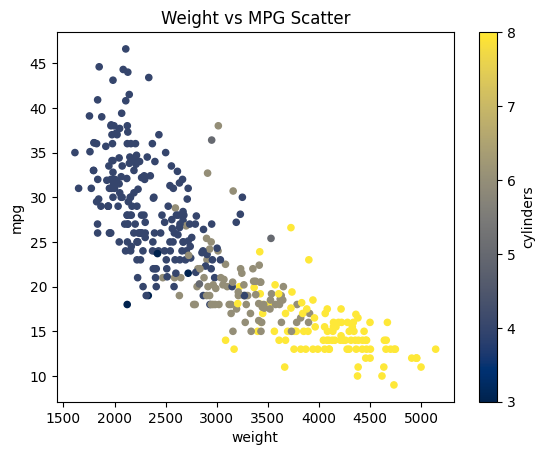

In [26]:
# 컬러맵 예시: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
df.plot.scatter(x='weight', y='mpg', c='cylinders', colormap='cividis', title='Weight vs MPG Scatter')

<Axes: title={'center': 'mpg'}, xlabel='model year'>

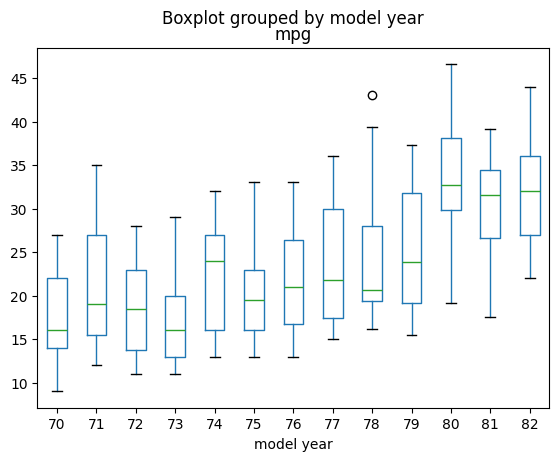

In [29]:
df.boxplot(column='mpg', by='model year', grid=False)

In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773522 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841367  0.896017   
displacement -0.804203   0.950721      1.000000    0.895849  0.932824   
horsepower   -0.773522   0.841367      0.895849    1.000000  0.862502   
weight       -0.831741   0.896017      0.932824    0.862502  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686676 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413816 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452011 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686676   -0.413816 -0.452011  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

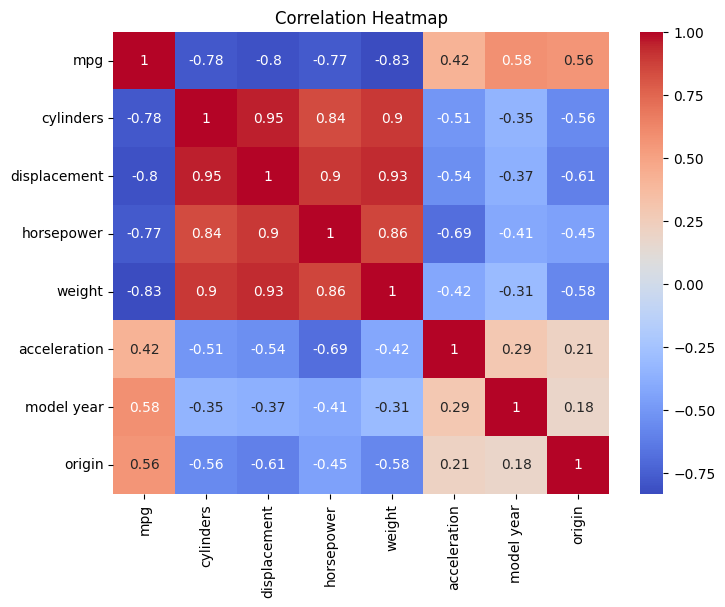

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap'a)
plt.show()